In [18]:
!pip install tensorflow
!pip install keras

In [21]:
!pip install protobuf==3.20

In [15]:
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

In [22]:
import protobuf

ModuleNotFoundError: No module named 'protobuf'

In [23]:
import tensorflow as tf

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [17]:
!pip install scipy==1.7

In [128]:
!pip install numpy --upgrade

  Using cached numpy-1.24.2-cp38-cp38-macosx_10_9_x86_64.whl (19.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.


In [ ]:
!pip install dask

### Importing Packages

In [158]:
import tensorflow

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: initialization failed

In [5]:
!pip install protoc >= 3.19.0

ERROR: Could not find a version that satisfies the requirement protoc (from versions: none)
ERROR: No matching distribution found for protoc


In [72]:
import pandas as pd 
import numpy as np
import xgboost as xgb
import time as t
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns', None)

### Reading CSVs

In [34]:
train = pd.read_csv("train_data.csv")
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.004838,NaN,0.

In [35]:
train.shape

(5531451, 190)

In [36]:
labels = pd.read_csv("train_labels.csv")
labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [37]:
train['S_2'] = pd.to_datetime(train['S_2'])

In [38]:
df = pd.merge(train, labels, on = 'customer_ID', how = 'left')
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.0048

In [39]:
df.shape

(5531451, 191)

In [40]:
len(df['customer_ID'].unique())

458913

In [41]:
df.loc[df['customer_ID'] == df.iloc[1,0], :].shape

(13, 191)

In [42]:
5531451/458913

12.053376130116165

### Randomly Selecting 1 month of data

In [43]:
df12 = df.sample(frac=1, random_state = 21)  #shuffling the data
df1 = df12.groupby('customer_ID',as_index=False).first()
print("Min :", df1['S_2'].min(), "Max: ", df1['S_2'].max())
df1.shape

Min : 2017-03-01 00:00:00 Max:  2018-03-31 00:00:00


(458913, 191)

In [44]:
df1.set_index('S_2').groupby(pd.Grouper(freq = 'M')).count()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
S_2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-31,30730,30600,30730,30730,30730,30730,26787,30730,30730,4606,24965,29565,30730,30730,30730,30730,26658,30730,28845,3931,30730,30730,30715,14705,30730,30730,30730,30676,30599,30730,10143,30730,30730,30730,30730,30730,26787,30730,30730,30674,17489,30730,30730,30730,20853,30730,30680,30730,29206,30687,30730,28822,30730,30724,30730,30730,17104,30730,30730,4156,30730,30724,30730,30730,30730,30730,30724,30730,30639,30730,30676,30730,30730,325,30730,30641,30730,4108,30730,30730,24320,30687,30730,29565,30631,30730,2442,30730,30641,30730,30730,30730,30694,9038,30730,30730,30730,30730,30724,30730,30730,30676,30730,2655,30730,30730,30730,59,30730,30730,170,30730,30730,30730,30730,30730,30730,30730,30730,30676,30730,30730,30695,30730,30730,30730,30730,30730,30730,30729,30730,30729,30726,30730,30730,30631,30631,15821,3925,30631,30730,30730,3268,30329,30730,1383,30730,344,344,345,30730,30730,26216,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30631,30631,30730,482,30631,30631,3931,30730,30730,2270,2270,2270,2270,2270,30631,30730,30631,5477,30631,30730,30631,30730
2017-04-30,31233,31097,31233,31233,31233,31233,27205,31233,31233,4907,25305,30024,31233,31233,31233,31233,26900,31233,29248,3970,31233,31233,31216,14866,31233,31233,31233,31175,31106,31233,10274,31233,31233,31233,31233,31233,27205,31233,31233,31167,17580,31233,31233,31233,21162,31233,31176,31233,29613,31186,31233,29154,31233,31226,31233,31233,17203,31233,31233,4159,31233,31226,31233,31233,31233,31233,31226,31233,31141,31233,31175,31233,31233,362,31233,31142,31233,4087,31233,31233,24690,31186,31233,30024,31126,31233,2494,31233,31142,31233,31233,31233,31199,9012,31233,31233,31233,31233,31226,31233,31233,31175,31233,2667,31233,31233,31233,62,31233,31233,154,31233,31233,31233,31233,31233,31233,31233,31233,31175,31233,31233,31191,31233,31233,31233,31233,31233,31233,31232,31233,31232,31233,31233,31233,31126,31126,16191,3964,31126,31233,31233,3281,30830,31233,1457,31233,299,299,300,31233,31233,26683,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31126,31126,31233,479,31126,31126,3970,31233,31233,2253,2253,2253,2253,2253,31126,31233,31126,5593,31126,31233,31126,31233
2017-05-31,31048,30901,31048,31048,31048,31048,27106,31048,31048,5182,25095,29842,31048,31048,31048,31048,26824,31048,29086,4030,31048,31048,31029,14811,31048,31048,31048,30987,30909,31048,10327,31048,31048,31048,31048,31048,27106,31048,31048,30976,17402,31048,31048,31048,21161,31048,30982,31048,29472,30988,31048,29031,31048,31048,31048,31048,17198,31048,31048,4171,31048,31048,31048,31048,31048,31048,31048,31048,30951,31048,30987,31048,31048,374,31048,30952,31048,4071,31048,31048,24521,30988,31048,29842,30934,31048,2563,31048,30952,31048,31048,31048,31009,8944,31048,31048,31048,31048,

In [45]:
df1.isnull().sum()

customer_ID         0
S_2                 0
P_2              2434
D_39                0
B_1                 0
                ...  
D_142          373333
D_143            2532
D_144               0
D_145            2532
target              0
Length: 191, dtype: int64

In [47]:
for i in df1.columns:
    if df1[i].dtypes != 'float64':
        print(i, df1[i].dtypes)

customer_ID object
S_2 datetime64[ns]
D_63 object
D_64 object
B_31 int64
target int64


In [48]:
df1['D_63'].unique()

array(['CR', 'CO', 'CL', 'XZ', 'XM', 'XL'], dtype=object)

In [49]:
df1['D_64'].unique()

array(['O', 'R', 'U', '-1', None], dtype=object)

#### Converting Categorical Variables to dummy variables

In [23]:
print("Min: ", df1['S_2'].min(), "Max: ", df1['S_2'].max())

Min:  2017-03-01 00:00:00 Max:  2018-03-31 00:00:00


In [51]:
df_new1 = pd.get_dummies(df1, columns = ['D_63', 'D_64'], drop_first = True)

In [52]:
df_new1.shape

(458913, 197)

In [54]:
df_new1.to_csv('final_df.csv', index = False)

In [8]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap], sep=<object object at 0x7f990d789410>, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whit

In [27]:
df_new = pd.read_csv('final_df.csv', index_col = False)
df_new.shape

(458913, 197)

In [5]:
df_new.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_O,D_64_R,D_64_U
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,NaN,NaN,0.007731,0.038862,0.720619,0.143630,0.006667,0.231009,0.529305,0.255736,NaN,0.075900,0.048918,0.001199,0.154026,1.341735,0.000519,0.001362,0.205468,0.691986,0.121518,NaN,0.054221,0.009484,0.006698,1.003738,0.003846,0.094311,0.129539,0.917133,0.231110,0.154914,0.095178,0.001653,0.126443,0.039259,0.027897,0.063697,0.233103,0.175655,0.031171,0.487460,0.093915,0.009479,0.001714,NaN,0.650112,0.007773,NaN,0.005851,6.0,0.216507,0.008605,0.507712,0.006821,0.000152,0.000104,0.001419,0.096441,0.007972,0.106020,0.032733,NaN,0.008156,0.076561,0.074432,NaN,0.004933,0.004831,0.421334,0.001833,0.005738,0.003289,0.002608,0.007338,NaN,0.007447,0.004465,0.006111,0.002246,0.002109,0.001141,0.506213,0.001770,1.000904,0.062492,0.005860,0.001845,0.007816,0.002470,0.005516,0.007166,NaN,0.0,0.000155,0.001504,NaN,0.002019,0.002678,NaN,1,0.007728,0.003432,0.002199,0.005511,0.004105,0.009656,1.006536,0.005158,0.003341,0.000264,1.509905,1.002915,0.003079,0.003845,0.007190,0.002983,0.000535,0.921026,0.131620,0.933479,0.978027,0.018200,0.822281,1.006125,1.005735,0.953363,NaN,0.673869,0.009998,0.017598,NaN,1.003175,2.0,NaN,0.009120,NaN,NaN,NaN,1.000130,0.120717,0.811199,0.008724,1.0,0.247939,0.0,4.0,0.244199,0.242325,0.0,0.705343,0.437433,0.002849,0.688774,0.000097,1.0,1.009886,1.005053,1.008132,0.009823,NaN,0.009680,0.004848,NaN,0.006312,0.004462,NaN,NaN,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0,0,1,0,0,0,1,0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-02-06,0.878856,0.536290,0.034558,1.005419,0.007248,0.159486,0.006274,0.008733,NaN,0.062028,0.000123,0.020876,0.263736,0.010155,0.003805,0.470223,0.398607,0.010117,NaN,0.211673,0.033179,0.004795,NaN,0.340006,0.011734,0.109444,0.239160,0.517843,0.301616,NaN,0.006361,0.015018,0.005666,1.005178,0.000279,0.136180,0.022597,0.319952,0.047516,0.695723,0.008499,0.003330,0.008624,0.017112,0.023292,0.239134,0.524772,0.103022,0.003985,0.444329,0.238523,0.000660,0.003267,NaN,1.001247,0.002385,NaN,0.000350,6.0,0.188421,0.002118,0.288901,0.008382,0.005944,0.009769,0.000006,0.010515,0.005811,0.406084,0.014946,NaN,0.005555,0.001238,0.009073,NaN,0.009167,0.009282,0.224252,0.033150,0.007601,0.003151,0.004500,0.006927,NaN,0.000067,0.004264,0.004670,0.005223,0.000015,0.005108,NaN,0.003619,1.002889,0.014986,0.003408,0.002738,0.009129,0.003361,0.000091,0.009003,NaN,0.0,0.005150,0.002534,NaN,0.002449,0.007003,NaN,1,0.009282,0.000871,0.005917,0.009783,0.001053,0.006891,1.000591,0.000540,0.005175,0.001321,0.007013,0.008394,0.005752,0.009342,0.006949,0.005339,0.002806,0.994174,0.140244,1.011297,0.975712,0.002006,0.001432,0.008440,0.009310,NaN,NaN,0.000299,0.004645,0.030284,NaN,1.009403,2.0,NaN,0.008252,NaN,NaN,NaN,1.000855,0.019818,0.003480,0.008714,1.0,0.448894,0.0,-1.0,0.438787,0.444072,1.0,0.539496,0.295148,0.005445,0.138098,0.007310,1

In [35]:
df_new['S_2'] = pd.to_datetime(df_new['S_2'])

In [13]:
df_new[['S_2', 'customer_ID', 'target']].set_index('S_2').groupby(pd.Grouper(freq = 'M')).agg({'customer_ID': 'count', 'target': 'mean'})

,customer_ID,target
S_2,,
2017-03-31,30730,0.233355
2017-04-30,31233,0.235264
2017-05-31,31048,0.237568
2017-06-30,31815,0.247933
2017-07-31,32620,0.247149
2017-08-31,33253,0.256428
2017-09-30,33427,0.261256
2017-10-31,34439,0.264439
2017-11-30,35664,0.263459


In [83]:
for i in df_new.columns:
    print(i)

customer_ID
S_2
P_2
D_39
B_1
B_2
R_1
S_3
D_41
B_3
D_42
D_43
D_44
B_4
D_45
B_5
R_2
D_46
D_47
D_48
D_49
B_6
B_7
B_8
D_50
D_51
B_9
R_3
D_52
P_3
B_10
D_53
S_5
B_11
S_6
D_54
R_4
S_7
B_12
S_8
D_55
D_56
B_13
R_5
D_58
S_9
B_14
D_59
D_60
D_61
B_15
S_11
D_62
D_65
B_16
B_17
B_18
B_19
D_66
B_20
D_68
S_12
R_6
S_13
B_21
D_69
B_22
D_70
D_71
D_72
S_15
B_23
D_73
P_4
D_74
D_75
D_76
B_24
R_7
D_77
B_25
B_26
D_78
D_79
R_8
R_9
S_16
D_80
R_10
R_11
B_27
D_81
D_82
S_17
R_12
B_28
R_13
D_83
R_14
R_15
D_84
R_16
B_29
B_30
S_18
D_86
D_87
R_17
R_18
D_88
B_31
S_19
R_19
B_32
S_20
R_20
R_21
B_33
D_89
R_22
R_23
D_91
D_92
D_93
D_94
R_24
R_25
D_96
S_22
S_23
S_24
S_25
S_26
D_102
D_103
D_104
D_105
D_106
D_107
B_36
B_37
R_26
R_27
B_38
D_108
D_109
D_110
D_111
B_39
D_112
B_40
S_27
D_113
D_114
D_115
D_116
D_117
D_118
D_119
D_120
D_121
D_122
D_123
D_124
D_125
D_126
D_127
D_128
D_129
B_41
B_42
D_130
D_131
D_132
D_133
R_28
D_134
D_135
D_136
D_137
D_138
D_139
D_140
D_141
D_142
D_143
D_144
D_145
target
D_63_CO
D_63_CR
D_63_XL
D_63_X

### Split Dataset in Train, Test1 & Test2

In [40]:
df_new['S_2'].min()

Timestamp('2017-03-01 00:00:00')

In [48]:
train_df = df_new.loc[(df_new['S_2'] >= '2017-05-01') & (df_new['S_2'] <= '2018-01-31'), :]
test1_df = df_new.loc[(df_new['S_2'] <= '2017-04-30') , :]
test2_df = df_new.loc[ (df_new['S_2'] >= '2018-02-01'), :]

In [49]:
train_df.shape

(308200, 197)

In [50]:
test1_df.shape

(61963, 197)

In [51]:
test2_df.shape

(88750, 197)

In [52]:
308200 + 61963 + 88750

458913

In [47]:
269243 +30730 +88750


388723

In [43]:
train_df['S_2'].max()

Timestamp('2018-01-31 00:00:00')

In [79]:
xtrain = train_df.drop(columns = ['target', 'customer_ID', 'S_2'])
ytrain = train_df['target']

In [80]:
xtrain.shape

(308200, 194)

In [152]:
mm = xgb.XGBClassifier(random_state = 21, scale_pos_weight = 0.5)
mm.fit(xtest1, ytest1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=21, ...)

In [157]:
fi = pd.DataFrame({'columns': xtest1.columns, 'feat_imp': mm.feature_importances_})
fi.loc[fi['feat_imp'] > 0.02,:].sort_values(['feat_imp'], ascending = False)


,columns,feat_imp
5,P_2,0.278974
32,B_17,0.045130
43,D_45,0.039840
26,D_53,0.027651
44,D_42,0.025641
18,S_3,0.025120
8,D_88,0.024469
23,D_66,0.024159
27,B_1,0.023788
0,D_132,0.021415


In [55]:
t1 = t.time()
m1 = xgb.XGBClassifier(random_state = 21)
m1.fit(xtrain, ytrain)
feat_imp = pd.DataFrame({'columns': xtrain.columns, 'feat_imp': m1.feature_importances_})
feat_imp.loc[feat_imp['feat_imp'] > 0.005,:].sort_values(['feat_imp'], ascending = False)
feat_imp.to_csv('feat_imp.csv')
t2 = t.time()
print(t2-t1)

244.67144799232483


In [150]:
print(m1.learning_rate)

None


In [93]:
feat_imp = pd.read_csv('feat_imp.csv')
feat_imp.drop(columns = ['Unnamed: 0'], inplace = True)
feat_imp.shape

(194, 2)

In [116]:
feat_imp.sort_values(['feat_imp'], ascending = False, inplace = True)
feat_imp.shape

(194, 2)

In [122]:
help(plt.xlabel)

Help on function xlabel in module matplotlib.pyplot:

xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
    Set the label for the x-axis.
    
    Parameters
    ----------
    xlabel : str
        The label text.
    
    labelpad : float, default: None
        Spacing in points from the axes bounding box including ticks
        and tick labels.
    
    loc : {'left', 'center', 'right'}, default: :rc:`xaxis.labellocation`
        The label position. This is a high-level alternative for passing
        parameters *x* and *horizontalalignment*.
    
    Other Parameters
    ----------------
    **kwargs : `.Text` properties
        `.Text` properties control the appearance of the label.
    
    See Also
    --------
    text : Documents the properties supported by `.Text`.



Text(0.5, 0, 'Feature Importance: Model 1 Default Params')

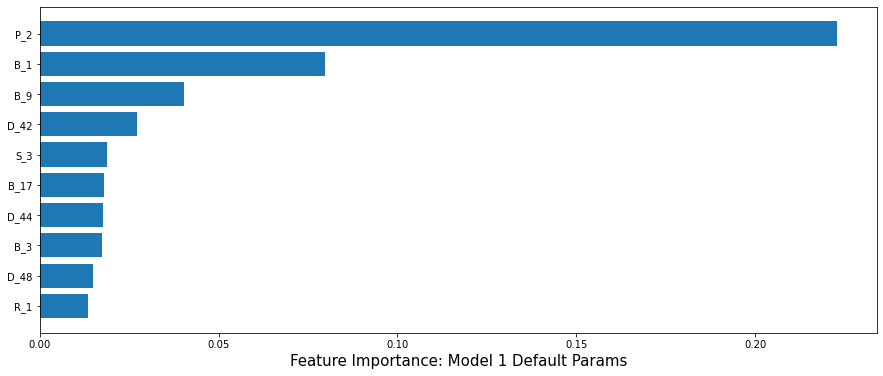

In [134]:
plt.figure(figsize=(15,6))
plt.barh(feat_imp.iloc[ :10, 0][::-1], feat_imp.iloc[:10, 1][::-1])
plt.xlabel("Feature Importance: Model 1 Default Params", fontdict = {'family':'sanserif','color':'black','size':15} )

In [61]:
help(xgb.XGBClassifier())

Help on XGBClassifier in module xgboost.sklearn object:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: Union[bool, NoneType] = None, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 |     

In [56]:
t1 = t.time()
m2 = xgb.XGBClassifier(n_estimators = 300, learning_rate = 0.5, 
                       max_depth = 4, subsample = .5, colsample_bytree = 0.5, scale_pos_weight = 5, random_state =21 )
m2.fit(xtrain, ytrain)
feat_imp1 = pd.DataFrame({'columns': xtrain.columns, 'feat_imp': m2.feature_importances_})
feat_imp1.loc[feat_imp1['feat_imp'] > 0.005,:].sort_values(['feat_imp'], ascending = False)
feat_imp1.to_csv('feat_imp1.csv')
t2 = t.time()
print(t2-t1)

190.81300926208496


In [89]:
feat_imp1.sort_values(['feat_imp'], ascending = False, inplace = True)

In [90]:
feat_imp1.shape

(194, 2)

In [81]:
xtrain.shape

(308200, 194)

In [82]:
sort = m2.feature_importances_.argsort()
sort[:20]

array([193, 189, 188, 108, 101, 153,  58, 186, 135,  95, 178,  36, 112,
       163,  94, 137,  68, 129,  41,  92])

In [112]:
feat_imp1.iloc[ :10, 0]

0        P_2
2        B_1
8       D_42
7        B_3
53      B_17
5        S_3
56      D_66
69      B_23
171    D_132
141     B_38
Name: columns, dtype: object

Text(0.5, 0, 'Feature Importance: Model 2 custom Params')

findfont: Font family ['sanserif'] not found. Falling back to DejaVu Sans.


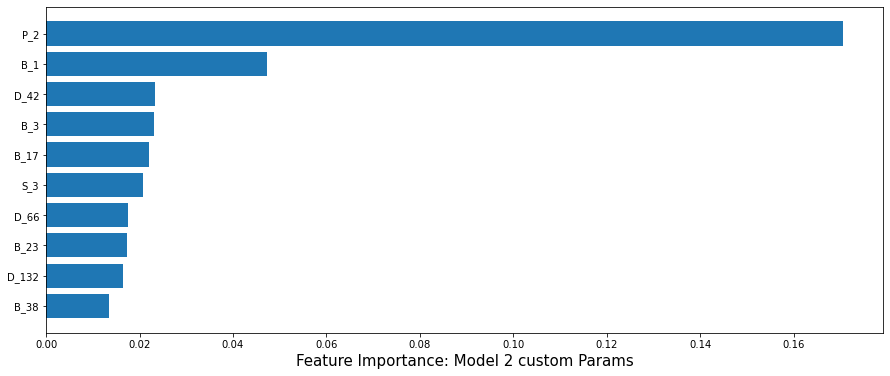

In [133]:
plt.figure(figsize=(15,6))
plt.barh(feat_imp1.iloc[ :10, 0][::-1], feat_imp1.iloc[:10, 1][::-1])
plt.xlabel("Feature Importance: Model 2 custom Params", fontdict = {'family':'sanserif','color':'black','size':15} )

In [45]:
start = t.time()
df_rnd1 = train.loc[(train['S_2'].dt.year == 2017) & (train['S_2'].dt.month == 7), :]
print(df_rnd1.shape)
end = t.time()
print(end - start)

(415602, 190)
31.137080669403076


In [57]:
feat_imp1.loc[feat_imp1['feat_imp'] > 0.005, 'columns'].reset_index()

,index,columns
0,0,P_2
1,2,B_1
2,4,R_1
3,5,S_3
4,6,D_41
5,7,B_3
6,8,D_42
7,9,D_43
8,10,D_44
9,11,B_4


In [58]:
feat_imp.loc[feat_imp1['feat_imp'] > 0.005, 'columns'].reset_index()

,index,columns
0,0,P_2
1,2,B_1
2,4,R_1
3,5,S_3
4,6,D_41
5,7,B_3
6,8,D_42
7,9,D_43
8,10,D_44
9,11,B_4


In [59]:
col = list(set(feat_imp1.loc[feat_imp1['feat_imp'] > 0.005, 'columns'].to_list()).union(set(feat_imp.loc[feat_imp['feat_imp'] > 0.005, 'columns'].to_list())))
print(col)

['D_132', 'P_3', 'D_44', 'D_64_O', 'D_52', 'P_2', 'D_56', 'B_23', 'D_88', 'R_1', 'D_76', 'D_110', 'D_77', 'D_62', 'B_11', 'B_2', 'D_51', 'D_108', 'S_3', 'D_50', 'R_3', 'B_3', 'D_49', 'D_66', 'B_38', 'D_75', 'D_53', 'B_1', 'B_4', 'D_111', 'D_134', 'D_41', 'B_17', 'D_46', 'B_5', 'D_43', 'S_23', 'B_9', 'D_48', 'R_27', 'B_18', 'D_112', 'D_47', 'D_45', 'D_42', 'S_24']


In [136]:
df_new.shape

(458913, 197)

In [140]:
features = pd.DataFrame(columns = ['Category', '# of Features', '# Selected'])
features['Category'] = ['Delinquency', 'Spend', 'Payment', 'Balance', 'Risk']
features['# of Features'] = 0 
features['# Selected'] = 0 

for i in df_new.columns:
    print(i)
    if 'P' in i: 
        print(i)
        features.loc[features['Category'] == 'Payment', '# of Features'] += 1
    elif 'S' in i: 
        features.loc[features['Category'] == 'Spend', '# of Features'] += 1
    elif 'D' in i: 
        features.loc[features['Category'] == 'Delinquency', '# of Features'] += 1
    elif 'B' in i: 
        features.loc[features['Category'] == 'Balance', '# of Features'] += 1
    else: 
        features.loc[features['Category'] == 'Risk', '# of Features'] += 1
        
for i in col:
    print(i)
    if 'P' in i: 
        print(i)
        features.loc[features['Category'] == 'Payment', '# Selected'] += 1
    elif 'S' in i: 
        features.loc[features['Category'] == 'Spend', '# Selected'] += 1
    elif 'D' in i: 
        features.loc[features['Category'] == 'Delinquency', '# Selected'] += 1
    elif 'B' in i: 
        features.loc[features['Category'] == 'Balance', '# Selected'] += 1
    else: 
        features.loc[features['Category'] == 'Risk', '# Selected'] += 1
                
features

customer_ID
S_2
P_2
P_2
D_39
B_1
B_2
R_1
S_3
D_41
B_3
D_42
D_43
D_44
B_4
D_45
B_5
R_2
D_46
D_47
D_48
D_49
B_6
B_7
B_8
D_50
D_51
B_9
R_3
D_52
P_3
P_3
B_10
D_53
S_5
B_11
S_6
D_54
R_4
S_7
B_12
S_8
D_55
D_56
B_13
R_5
D_58
S_9
B_14
D_59
D_60
D_61
B_15
S_11
D_62
D_65
B_16
B_17
B_18
B_19
D_66
B_20
D_68
S_12
R_6
S_13
B_21
D_69
B_22
D_70
D_71
D_72
S_15
B_23
D_73
P_4
P_4
D_74
D_75
D_76
B_24
R_7
D_77
B_25
B_26
D_78
D_79
R_8
R_9
S_16
D_80
R_10
R_11
B_27
D_81
D_82
S_17
R_12
B_28
R_13
D_83
R_14
R_15
D_84
R_16
B_29
B_30
S_18
D_86
D_87
R_17
R_18
D_88
B_31
S_19
R_19
B_32
S_20
R_20
R_21
B_33
D_89
R_22
R_23
D_91
D_92
D_93
D_94
R_24
R_25
D_96
S_22
S_23
S_24
S_25
S_26
D_102
D_103
D_104
D_105
D_106
D_107
B_36
B_37
R_26
R_27
B_38
D_108
D_109
D_110
D_111
B_39
D_112
B_40
S_27
D_113
D_114
D_115
D_116
D_117
D_118
D_119
D_120
D_121
D_122
D_123
D_124
D_125
D_126
D_127
D_128
D_129
B_41
B_42
D_130
D_131
D_132
D_133
R_28
D_134
D_135
D_136
D_137
D_138
D_139
D_140
D_141
D_142
D_143
D_144
D_145
target
D_63_CO
D_63_CR
D_

,Category,# of Features,# Selected
0,Delinquency,103,27
1,Spend,22,3
2,Payment,3,2
3,Balance,40,11
4,Risk,29,3


In [141]:
features

,Category,# of Features,# Selected
0,Delinquency,103,27
1,Spend,22,3
2,Payment,3,2
3,Balance,40,11
4,Risk,29,3


In [135]:
len(col)


46

In [61]:
df = df_new.loc[:, col]
df.shape

(458913, 46)

In [62]:
train_df.shape


(308200, 197)

In [63]:
xtrain = train_df[col]
xtest1 = test1_df[col]
xtest2 = test2_df[col]

In [64]:
ytrain = train_df['target']
ytest1 = test1_df['target']
ytest2 = test2_df['target']

In [65]:
xtrain.to_csv('xtrain.csv', index = False)
xtest1.to_csv('xtest1.csv', index = False)
xtest2.to_csv('xtest2.csv', index = False)
ytest1.to_csv('ytest1.csv', index = False)
ytest2.to_csv('ytest2.csv', index = False)
ytrain.to_csv('ytrain.csv', index = False)

In [72]:
test2_df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_145', 'target', 'D_63_CO', 'D_63_CR', 'D_63_XL', 'D_63_XM',
       'D_63_XZ', 'D_64_O', 'D_64_R', 'D_64_U'],
      dtype='object', length=197)

In [73]:
xtrain.shape

(269243, 44)

In [74]:
ytrain.shape

(269243,)

In [66]:
t1 = t.time()
grid_search = pd.DataFrame(columns = ['No. of Trees', 'LR', 'Subsample', '%features', 'Default Weight', 'AUC Train', 'AUC Test1', 'AUC Test2'])
num_trees = [50, 100, 300]
lr = [0.01, .1]
subsample = [.5, .8]
feat = [.5, 1]
def_w = [1, 5, 10]

row = 0
for i in num_trees:
    for j in lr:
        for k in subsample:
            for f in feat:
                for d in def_w:
                    xgb_inst = xgb.XGBClassifier(n_estimators = i, learning_rate = j, subsample = k, colsample_bytree = f, scale_pos_weight = d, random_state = 21)
                    model = xgb_inst.fit(xtrain, ytrain)
                    print(row)
                    grid_search.loc[row, 'No. of Trees'] = i 
                    grid_search.loc[row, 'LR'] = j 
                    grid_search.loc[row, 'Subsample'] = k 
                    grid_search.loc[row, '%features'] = f 
                    grid_search.loc[row, 'Default Weight'] = d 
                    grid_search.loc[row,"AUC Train"] = roc_auc_score(ytrain, model.predict_proba(xtrain)[:,1])
                    grid_search.loc[row,"AUC Test1"] = roc_auc_score(ytest1, model.predict_proba(xtest1)[:,1])
                    grid_search.loc[row,"AUC Test2"] = roc_auc_score(ytest2, model.predict_proba(xtest2)[:,1])
                    row += 1
                    
t2 = t.time()  
print(t2-t1)
grid_search
                    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
5585.973841905594


,No. of Trees,LR,Subsample,%features,Default Weight,AUC Train,AUC Test1,AUC Test2
0,50,0.01,0.5,0.5,1,0.930397,0.918615,0.933299
1,50,0.01,0.5,0.5,5,0.928443,0.917089,0.93024
2,50,0.01,0.5,0.5,10,0.9263,0.914873,0.928382
3,50,0.01,0.5,1,1,0.925704,0.912868,0.92973
4,50,0.01,0.5,1,5,0.923894,0.911928,0.92748
...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,5,0.955172,0.932711,0.94343
68,300,0.1,0.8,0.5,10,0.953969,0.932288,0.943299
69,300,0.1,0.8,1,1,0.95728,0.933104,0.94379
70,300,0.1,0.8,1,5,0.956434,0.933083,0.943606


In [84]:
grid_search.to_csv("grid_search.csv", index = False)

In [67]:
grid_search.sort_values(['AUC Train'], ascending = False)

,No. of Trees,LR,Subsample,%features,Default Weight,AUC Train,AUC Test1,AUC Test2
69,300,0.1,0.8,1,1,0.95728,0.933104,0.94379
63,300,0.1,0.5,1,1,0.956448,0.932729,0.943296
70,300,0.1,0.8,1,5,0.956434,0.933083,0.943606
64,300,0.1,0.5,1,5,0.95546,0.932635,0.942838
71,300,0.1,0.8,1,10,0.955314,0.932399,0.942893
...,...,...,...,...,...,...,...,...
35,100,0.01,0.8,1,10,0.92457,0.912815,0.927678
4,50,0.01,0.5,1,5,0.923894,0.911928,0.92748
10,50,0.01,0.8,1,5,0.923329,0.911282,0.926616
5,50,0.01,0.5,1,10,0.921244,0.909524,0.925506


In [88]:
grid_search.iloc[0, -3]

0.9305782740137187

In [89]:
grid_search.shape

(72, 8)

In [166]:
xtrain.shape

(308200, 194)

In [69]:
xgb_inst = xgb.XGBClassifier(n_estimators = 300, learning_rate = 0.1, subsample = 0.8, colsample_bytree = 1, scale_pos_weight = 1, random_state = 21)
final_xgb = xgb_inst.fit(xtrain, ytrain)
final_xgb.save_model("final_xgb.json")

In [197]:
xtest1 = pd.read_csv('xtest1.csv', index_col = False)
xtest2 = pd.read_csv('xtest2.csv', index_col = False)
ytest1 = pd.read_csv('ytest1.csv', index_col = False)
ytest2 = pd.read_csv('ytest2.csv', index_col = False)
ytrain = pd.read_csv('ytrain.csv', index_col = False)
xtrain = pd.read_csv('xtrain.csv', index_col = False)

In [198]:
final_xgb = xgb.XGBClassifier()
final_xgb.load_model("final_xgb.json")

In [232]:
y_pred = final_xgb.predict_proba(xtrain)[:,1]
ytest1_pred = final_xgb.predict_proba(xtest1)[:,1]
ytest2_pred = final_xgb.predict_proba(xtest2)[:,1]


In [200]:
ytest2_pred

array([0.00097135, 0.00388424, 0.002486  , ..., 0.003181  , 0.17033646,
       0.00496028], dtype=float32)

In [170]:
ytrain.

(308200, 1)

In [181]:
# Rank Ordering
perf_train_data = pd.DataFrame({"Actual": ytrain['target'], "Prediction": final_xgb.predict_proba(xtrain)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)

In [182]:
quantiles

[0,
 0.0013835063320584596,
 0.002846248354762793,
 0.0060503693297505375,
 0.015027956664562227,
 0.046310119330883026,
 0.158120796084404,
 0.3935984671115874,
 0.6430687308311462,
 0.8354373037815097,
 1]

In [183]:
perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00138]",3,30820,0.000097
"(0.00138, 0.00285]",20,30820,0.000649
"(0.00285, 0.00605]",61,30820,0.001979
"(0.00605, 0.015]",146,30820,0.004737
"(0.015, 0.0463]",528,30820,0.017132
"(0.0463, 0.158]",2244,30820,0.072810
"(0.158, 0.394]",7301,30820,0.236892
"(0.394, 0.643]",15907,30820,0.516126
"(0.643, 0.835]",24016,30820,0.779234


AttributeError: 'Rectangle' object has no property 'fontdict'

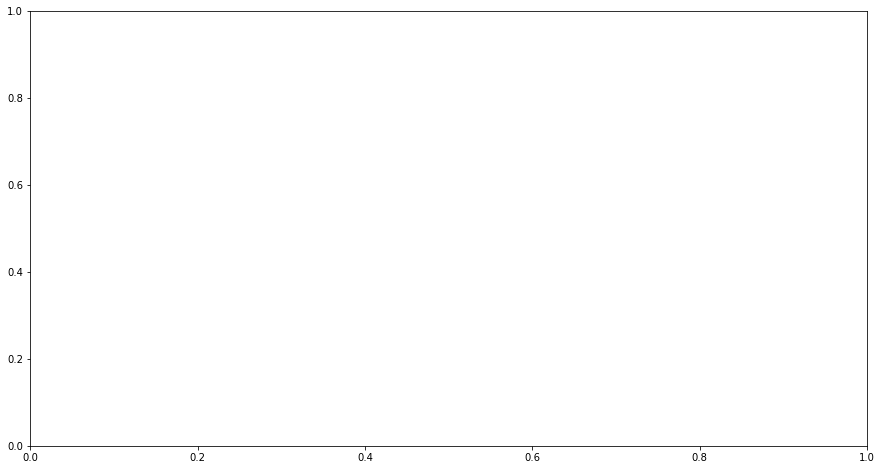

In [194]:
stat.loc[:, 'Bad Rate'].plot(kind = 'bar', figsize=(15, 8), title = 'Train', fontdict = {'size': 11})

/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


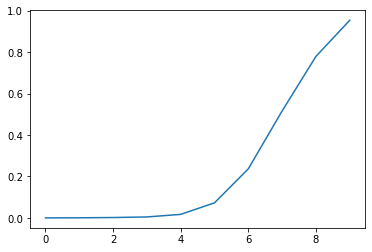

In [174]:
import matplotlib.pyplot as plt

plt.plot(stat["Bad Rate"])

In [188]:
perf_test_data = pd.DataFrame({"Actual": ytest1['target'], "Prediction": final_xgb.predict_proba(xtest1)[:,1]})

perf_test_data["Score Bins"] = pd.cut(perf_test_data["Prediction"], quantiles)
stat1 = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat1["Bad Rate"] = stat1["sum"] / stat1["count"]
stat1

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00138]",4,6349,0.000630
"(0.00138, 0.00285]",15,6488,0.002312
"(0.00285, 0.00605]",37,6618,0.005591
"(0.00605, 0.015]",53,6658,0.007960
"(0.015, 0.0463]",225,6586,0.034163
"(0.0463, 0.158]",781,6484,0.120450
"(0.158, 0.394]",1898,6253,0.303534
"(0.394, 0.643]",3218,6072,0.529974
"(0.643, 0.835]",4064,5640,0.720567


<AxesSubplot:title={'center':'Test1'}, xlabel='Score Bins'>

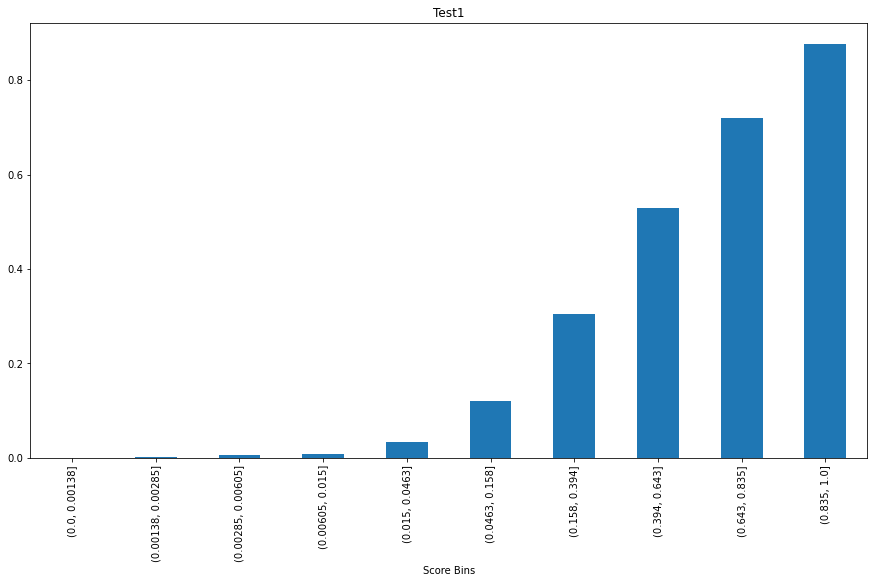

In [191]:
stat1.loc[:, 'Bad Rate'].plot(kind = 'bar', figsize=(15, 8), title = "Test1")

In [189]:
perf_test_data2 = pd.DataFrame({"Actual": ytest2['target'], "Prediction": final_xgb.predict_proba(xtest2)[:,1]})

perf_test_data2["Score Bins"] = pd.cut(perf_test_data2["Prediction"], quantiles)
stat2 = perf_test_data2.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat2["Bad Rate"] = stat2["sum"] / stat2["count"]
stat2

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00138]",6,7647,0.000785
"(0.00138, 0.00285]",7,7964,0.000879
"(0.00285, 0.00605]",26,8337,0.003119
"(0.00605, 0.015]",65,8401,0.007737
"(0.015, 0.0463]",190,8710,0.021814
"(0.0463, 0.158]",730,9023,0.080904
"(0.158, 0.394]",2572,9773,0.263174
"(0.394, 0.643]",5212,10012,0.520575
"(0.643, 0.835]",6680,8983,0.743627


<AxesSubplot:title={'center':'Test2'}, xlabel='Score Bins'>

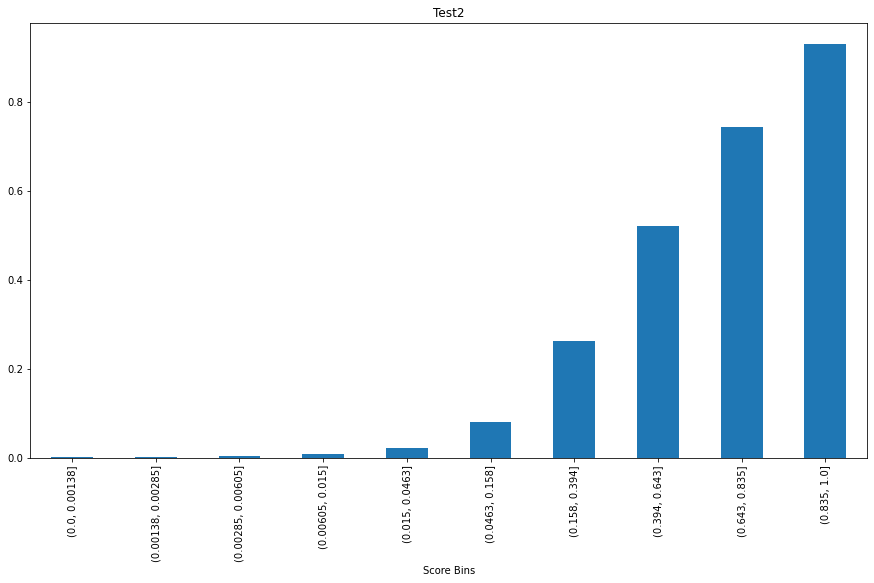

In [192]:
stat2.loc[:, 'Bad Rate'].plot(kind = 'bar', figsize=(15, 8), title = "Test2")

In [32]:
ytest2_pred = final_xgb.predict_proba(xtest2)

In [35]:
ytest2_pred[:, 1]

array([0.0016039 , 0.00841289, 0.87515926, ..., 0.00989304, 0.47015622,
       0.07696212], dtype=float32)

### Neural Network 

### Normalisation

In [109]:
from sklearn.preprocessing import StandardScaler, RobustScaler
sc = StandardScaler()
sc.fit(xtrain)

xtrain_n = sc.transform(xtrain)
xtest1_n  = sc.transform(xtest1)
xtest2_n  = sc.transform(xtest2)


In [110]:
# convert to Pandas DF
xtrain_n_df = pd.DataFrame(xtrain_n, columns=xtrain.columns)
xtest1_n_df = pd.DataFrame(xtest1_n, columns=xtest1.columns)
xtest2_n_df = pd.DataFrame(xtest2_n, columns=xtest2.columns)

### Outlier Treatment

In [111]:
xtrain_n_df.describe(percentiles = [.01, .99]).T

,count,mean,std,min,1%,50%,99%,max
D_50,124737.0,-1.228271e-17,1.000004,-9.430230,-0.289255,-0.112616,1.428428,172.617623
R_27,264585.0,4.122765e-16,1.000002,-2.855378,-2.790216,0.361637,0.379136,0.379502
S_3,236579.0,-2.066155e-17,1.000002,-4.015997,-1.145587,-0.324699,4.054131,24.229447
B_17,147759.0,4.268301e-16,1.000003,-1.640992,-1.639907,0.621905,0.791418,0.792079
B_39,2503.0,1.656242e-16,1.000200,-0.746401,-0.696336,-0.368080,2.817070,2.985179
D_48,253023.0,7.741895e-17,1.000002,-1.160430,-1.129802,-0.319232,1.946773,26.540482
D_77,216167.0,5.944298e-17,1.000002,-0.974985,-0.965012,-0.264866,3.484966,43.725639
D_75,269243.0,1.214469e-16,1.000002,-0.764174,-0.762998,-0.429796,3.742757,18.425502
D_53,87144.0,-1.492678e-16,1.000006,-0.388058,-0.386658,-0.313793,4.485733,32.173020
D_132,36199.0,-8.290099e-17,1.000014,-0.745469,-0.685771,-0.238933,3.287098,21.635304


In [112]:
xtrain_n_df.quantile(0.99)

D_50       1.428428
R_27       0.379136
S_3        4.054131
B_17       0.791418
B_39       2.817070
D_48       1.946773
D_77       3.484966
D_75       3.742757
D_53       4.485733
D_132      3.287098
B_1        4.167729
B_3        3.774454
D_44       4.111855
B_2        0.965602
D_42       3.566699
B_9        2.892219
D_49       2.069076
D_111      0.512104
D_45       3.119760
D_88       3.925734
B_5        2.328823
D_66       0.349962
B_38       2.747680
S_23       0.893273
D_43       4.004007
D_63_CO    0.579519
D_41       4.548496
D_51       3.610049
P_2        1.461844
B_7        3.589984
R_26       3.917072
D_74       3.896508
D_62       3.488945
B_4        3.743302
D_56       3.622786
B_10       0.092872
B_8        1.094237
D_46       3.051949
D_76       2.959534
D_110      0.877978
P_3        2.361980
D_64_O     0.929423
S_7        3.810535
R_1        4.239192
Name: 0.99, dtype: float64

In [116]:
for i in xtrain_n_df.columns:
    xtrain_n_df[i] = np.where(xtrain_n_df[i] > xtrain_n_df[i].quantile(0.99), xtrain_n_df[i].quantile(0.99), xtrain_n_df[i] )
    xtrain_n_df[i] = np.where(xtrain_n_df[i] < xtrain_n_df[i].quantile(0.01), xtrain_n_df[i].quantile(0.01), xtrain_n_df[i] )

for i in xtest1_n_df.columns:
    xtest1_n_df[i] = np.where(xtest1_n_df[i] > xtest1_n_df[i].quantile(0.99), xtest1_n_df[i].quantile(0.99), xtest1_n_df[i] )
    xtest1_n_df[i] = np.where(xtest1_n_df[i] < xtest1_n_df[i].quantile(0.01), xtest1_n_df[i].quantile(0.01), xtest1_n_df[i] )

for i in xtest2_n_df.columns:
    xtest2_n_df[i] = np.where(xtest2_n_df[i] > xtest2_n_df[i].quantile(0.99), xtest2_n_df[i].quantile(0.99), xtest2_n_df[i] )
    xtest2_n_df[i] = np.where(xtest2_n_df[i] < xtest2_n_df[i].quantile(0.01), xtest2_n_df[i].quantile(0.01), xtest2_n_df[i] )
    

In [117]:
xtrain_n_df.describe(percentiles = [.01, .99]).T

,count,mean,std,min,1%,50%,99%,max
D_50,124737.0,-3.359599e-02,0.266379,-0.289253,-0.289253,-0.112616,1.428200,1.428246
R_27,264585.0,1.332669e-04,0.999623,-2.790215,-2.790215,0.361637,0.379136,0.379136
S_3,236579.0,-1.165025e-02,0.917373,-1.145561,-1.145555,-0.324699,4.054081,4.054083
B_17,147759.0,2.010826e-06,0.999992,-1.639907,-1.639907,0.621905,0.791418,0.791418
B_39,2503.0,-5.255874e-05,0.999375,-0.696269,-0.696204,-0.368080,2.817063,2.817065
D_48,253023.0,-3.080700e-03,0.990448,-1.129801,-1.129801,-0.319232,1.946748,1.946755
D_77,216167.0,-1.075533e-02,0.922959,-0.965011,-0.965011,-0.264866,3.484958,3.484959
D_75,269243.0,-1.114791e-02,0.942911,-0.762998,-0.762997,-0.429796,3.742752,3.742753
D_53,87144.0,-2.712624e-02,0.772094,-0.386657,-0.386657,-0.313793,4.485345,4.485412
D_132,36199.0,-3.862500e-02,0.671473,-0.685769,-0.685769,-0.238933,3.286209,3.286209


### Missing Value Imputation

In [119]:
xtrain_n_df.fillna(0,inplace=True)
xtest1_n_df.fillna(0,inplace=True)
xtest2_n_df.fillna(0,inplace=True)

In [216]:
def strategy(x, actual, pred, threshold, balance = 'B_2', spend = 'S_3'):
  ydf = pd.DataFrame({'actual': actual, 'pred': pred})
  df = pd.concat([x, ydf], axis = 1)
  total = df.loc[df['pred'] < threshold].shape[0]
  default = df.loc[df['pred'] < threshold, 'actual'].mean()

  df['revenue'] = df.apply(lambda x: x[balance]*0.02 + x[spend]*.001 if x['actual'] != 1 else 0, axis = 1)

  revenue = df.loc[df['pred'] < threshold, 'revenue'].sum()

  return [total, default, revenue]

In [227]:
def ex_sum(xdf, actual, pred, balance = 'B_2', spend = 'S_3'):
    summary = pd.DataFrame(columns = ['Threshold', '#Total', 'Default Rate', 'Revenue'])
    summary['Threshold'] = [(i+1)*0.1 for i in range(10)]
    for i in range(10):
        summary.iloc[i, 1:] = strategy(xdf, actual, pred, summary.iloc[i, 0] , balance = 'B_2', spend = 'S_3')
    
    return summary



In [225]:
summary = pd.DataFrame(columns = ['Threshold', '#Total', 'Default Rate', 'Revenue'])
for i in range(10):
    threshold =  (i+1)*0.1
    print(threshold)
    summary.iloc[i, 0] = threshold
    summary.iloc[i, 1:] = [2,3,4]

0.1


IndexError: iloc cannot enlarge its target object

In [215]:
summary.iloc[0, 0] = 3903
summary

,Threshold,#Total,Default Rate,Revenue
0,3903.0,2,3,4
1,0.2,NaN,NaN,NaN
2,0.3,NaN,NaN,NaN
3,0.4,NaN,NaN,NaN
4,0.5,NaN,NaN,NaN
5,0.6,NaN,NaN,NaN
6,0.7,NaN,NaN,NaN
7,0.8,NaN,NaN,NaN
8,0.9,NaN,NaN,NaN
9,1.0,NaN,NaN,NaN


In [233]:
summ = ex_sum(xtrain, ytrain['target'], y_pred, balance = 'B_2', spend = 'S_3')
summ

,Threshold,#Total,Default Rate,Revenue
0,0.1,172995,0.009989,2370.581897
1,0.2,191455,0.020887,2528.340628
2,0.3,204573,0.033367,2614.341308
3,0.4,216506,0.048867,2676.874763
4,0.5,228384,0.068901,2724.775644
5,0.6,240891,0.09376,2763.614149
6,0.7,254848,0.12531,2791.002869
7,0.8,271002,0.164929,2809.460402
8,0.9,290154,0.213418,2818.459241
9,1.0,308200,0.25831,2819.650544


In [234]:
summ1 = ex_sum(xtest1, ytest1['target'], ytest1_pred, balance = 'B_2', spend = 'S_3')
summ1

,Threshold,#Total,Default Rate,Revenue
0,0.1,36684,0.019436,495.792901
1,0.2,40481,0.03409,527.187021
2,0.3,43201,0.050323,542.971991
3,0.4,45593,0.067664,554.82373
4,0.5,47995,0.086905,564.420393
5,0.6,50440,0.110607,571.342882
6,0.7,53052,0.136658,577.175083
7,0.8,56007,0.167818,582.004945
8,0.9,59264,0.203817,585.543222
9,1.0,61963,0.234317,586.974128


In [235]:
summ2 = ex_sum(xtest2, ytest2['target'], ytest2_pred, balance = 'B_2', spend = 'S_3')
summ2

,Threshold,#Total,Default Rate,Revenue
0,0.1,46549,0.01304,629.339495
1,0.2,52125,0.026456,676.621066
2,0.3,56268,0.042458,705.157641
3,0.4,60104,0.061427,726.074571
4,0.5,63954,0.084905,741.99929
5,0.6,68082,0.113569,754.773909
6,0.7,72316,0.144519,764.144276
7,0.8,77042,0.181745,770.911223
8,0.9,82638,0.227789,774.733769
9,1.0,88750,0.278287,775.683408


In [236]:
x = pd.concat([xtest1, xtrain, xtest2], axis = 0)
y = pd.concat([ytest1, ytrain, ytest2], axis = 0)
yhat = np.concatenate((ytest1_pred , y_pred, ytest2_pred), axis = 0)

overall = ex_sum(x, y['target'], yhat, balance = 'B_2', spend = 'S_3')
overall

,Threshold,#Total,Default Rate,Revenue
0,0.1,256228,0.011896,3495.714294
1,0.2,284061,0.023791,3732.148715
2,0.3,304042,0.037459,3862.47094
3,0.4,322203,0.05387,3957.773064
4,0.5,340333,0.074448,4031.195327
5,0.6,359413,0.099877,4089.730941
6,0.7,380216,0.130547,4132.322228
7,0.8,404051,0.168536,4162.376569
8,0.9,432056,0.214849,4178.736232
9,1.0,458913,0.258934,4182.30808


In [239]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner', 'cross'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to 

In [247]:
summ.merge(summ1, on = 'Threshold', suffixes=('_', ''), how = 'left' ).merge(summ2, on = 'Threshold', how = 'left').merge(overall, on = 'Threshold', how = 'left').to_csv('strategy.csv', index = False)

In [248]:
strategy(xtrain, ytrain['target'], y_pred, 0.55, balance = 'B_2', spend = 'S_3')

[234490, 0.08058765832231651, 2745.1238495846824]

In [264]:
def ex1(xdf, actual, pred, c, a, balance = 'B_2', spend = 'S_3'):
    summary = pd.DataFrame(columns = ['#Total', 'Default Rate', 'Revenue'], index = ['Conservative', 'Aggressive'])
    summary.loc['Conservative', :] = strategy(xdf, actual, pred, c, balance = 'B_2', spend = 'S_3')
    summary.loc['Aggressive', :] = strategy(xdf, actual, pred, a, balance = 'B_2', spend = 'S_3')
    return summary

exsum = ex1(xtrain, ytrain['target'], y_pred, 0.5, 0.3, balance = 'B_2', spend = 'S_3')
exsum1 = ex1(xtest1, ytest1['target'], ytest1_pred, 0.5, 0.3, balance = 'B_2', spend = 'S_3')
exsum2 = ex1(xtest2, ytest2['target'], ytest2_pred, 0.5, 0.3, balance = 'B_2', spend = 'S_3')
ex_ov = ex1(x, y['target'], yhat, 0.55, 0.4, balance = 'B_2', spend = 'S_3')




In [255]:
help(df.join)

Help on method join in module pandas.core.frame:

join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Join columns of another DataFrame.
    
    Join columns with `other` DataFrame either on index or on a key
    column. Efficiently join multiple DataFrame objects by index at once by
    passing a list.
    
    Parameters
    ----------
    other : DataFrame, Series, or list of DataFrame
        Index should be similar to one of the columns in this one. If a
        Series is passed, its name attribute must be set, and that will be
        used as the column name in the resulting joined DataFrame.
    on : str, list of str, or array-like, optional
        Column or index level name(s) in the caller to join on the index
        in `other`, otherwise joins index-on-index. If multiple
        values given, the `other` DataFrame must have a MultiIndex. Can
        pass an array as the join key if it is not

In [265]:
exsum.join(exsum1, rsuffix='_1').join(exsum2, rsuffix = '_2').join(ex_ov, rsuffix = '_').to_excel('ex_strategy.xlsx')